# Model 48
## Feature Importance for model with fc meta features
*NOTE* - I need to start saving the feature importance of meta features. Otherwise the meta features hold all the importance in the final model and we can't learn much.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
%matplotlib inline

In [48]:
fi = pd.DataFrame()
types = ['1JHC', '1JHN', '2JHC', '2JHN', '2JHH', '3JHC', '3JHN', '3JHH']
for t in types:
    for f in os.listdir(f'../type_results/{t}'):
        if 'fi' in f and 'M048' in f:
            print(f)
            df = pd.read_parquet(f'../type_results/{t}/{f}')
            fi = pd.concat([fi, df])

M048_0718_1745_1JHC_fi_0.4379MAE_-0.8258LMAE_catboost_3folds_500000iter_0.1lr.parquet
M048_0717_2239_1JHN_fi_0.3367MAE_-1.089LMAE_catboost_3folds_500000iter_0.1lr.parquet
M048_0718_1745_2JHN_fi_0.1246MAE_-2.082LMAE_catboost_3folds_500000iter_0.1lr.parquet
M048_0717_2239_2JHH_fi_0.1020MAE_-2.282LMAE_catboost_3folds_500000iter_0.1lr.parquet
M048_0717_2239_3JHN_fi_0.0981MAE_-2.321LMAE_catboost_3folds_500000iter_0.1lr.parquet
M048_0718_1745_3JHH_fi_0.1242MAE_-2.086LMAE_catboost_3folds_500000iter_0.1lr.parquet


In [49]:
use_feats = pd.DataFrame()
for i, d in fi.groupby('type'):
    print(i)
    d2 = d.groupby('feature')[['importance']].max()
    use_feats[i] = d2['importance'] > 0.001

1JHC
1JHN
2JHH
2JHN
3JHH
3JHN


In [50]:
# use_feats.to_csv('../fi/Good_Features_By_Type.csv')

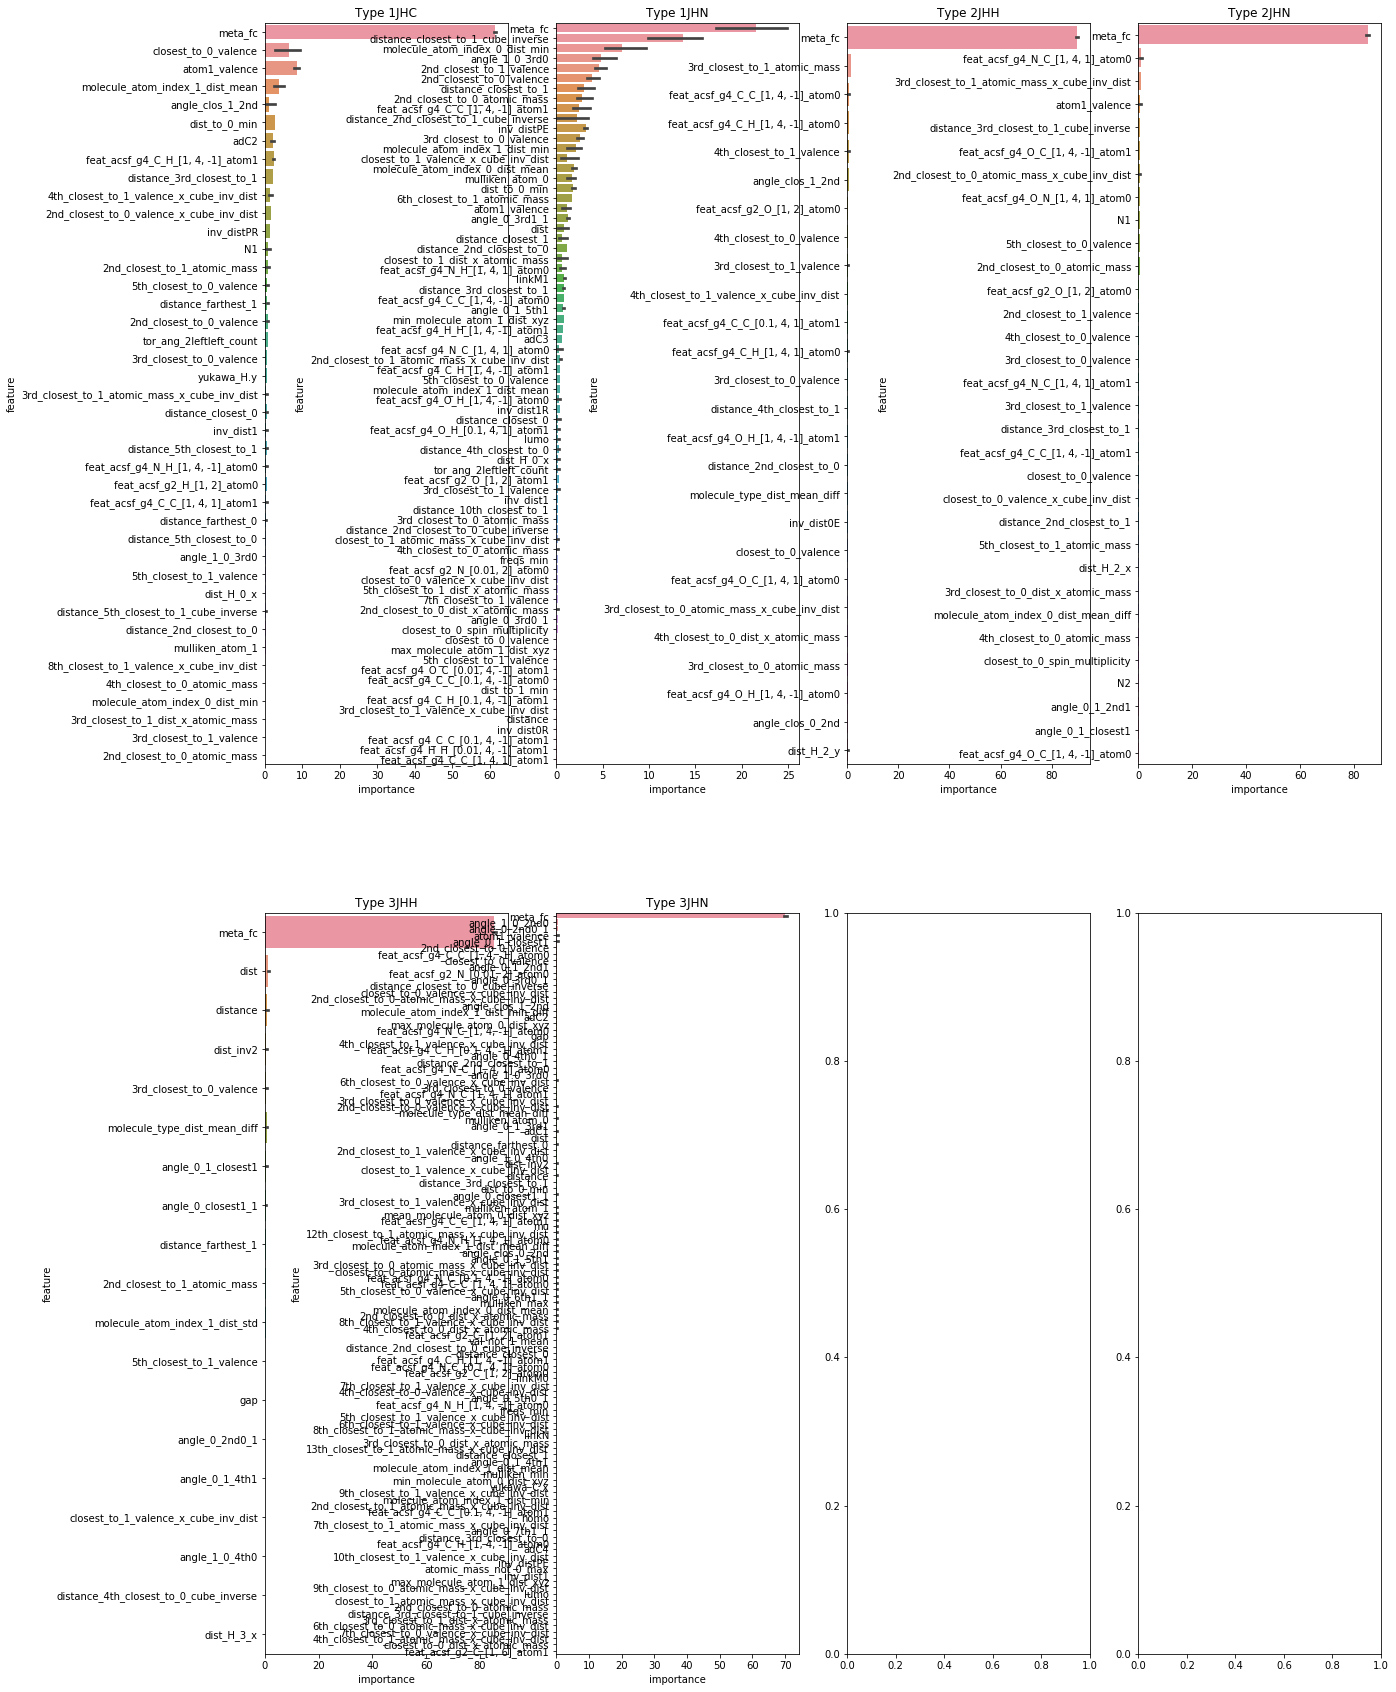

In [51]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 30))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
ax_idx = 0
for t in use_feats.columns.tolist():
    fi_t = fi.loc[fi['type'] == t]
    fi_t = fi_t.loc[fi_t['importance'] >= 0.1]
    #plt.figure(figsize=(12, 20))
    sns.barplot(x='importance',
                y='feature',
                data=fi_t.sort_values('importance',
                                    ascending=False),
               ax=axes[ax_idx])
    axes[ax_idx].set_title(f'Type {t}')
    ax_idx += 1
plt.show()

# Meta Feature Importance

In [52]:
fi_meta = pd.DataFrame()
types = ['1JHC', '1JHN', '2JHC', '2JHN', '2JHH', '3JHC', '3JHN', '3JHH']
for t in types:
    for f in os.listdir(f'../type_results/{t}/meta/'):
        if 'fi' in f and 'M048' in f:
            print(f)
            df = pd.read_parquet(f'../type_results/{t}/meta/{f}')
            fi_meta = pd.concat([fi_meta, df])

M048_0718_1745_1JHC_fi_meta_fc_f2_0.5799MAE_-0.5449LMAE.parquet
M048_0718_1745_1JHC_fi_meta_fc_f1_0.5814MAE_-0.5423LMAE.parquet
M048_0718_1745_1JHC_fi_meta_fc_f3_0.5810MAE_-0.5429LMAE.parquet
M048_0717_2239_1JHN_fi_meta_fc_f1_0.4710MAE_-0.7528LMAE.parquet
M048_0717_2239_1JHN_fi_meta_fc_f2_0.4497MAE_-0.7991LMAE.parquet
M048_0717_2239_1JHN_fi_meta_fc_f3_0.3826MAE_-0.9608LMAE.parquet
M048_0720_0646_2JHC_fi_meta_fc_f1_0.2447MAE_-1.4079LMAE.parquet
M048_0718_1745_2JHC_fi_meta_fc_f1_0.2447MAE_-1.4079LMAE.parquet
M048_0718_1745_2JHN_fi_meta_fc_f3_0.1912MAE_-1.6546LMAE.parquet
M048_0718_1745_2JHN_fi_meta_fc_f2_0.1893MAE_-1.6647LMAE.parquet
M048_0718_1745_2JHN_fi_meta_fc_f1_0.1905MAE_-1.6583LMAE.parquet
M048_0717_2239_2JHH_fi_meta_fc_f1_0.1436MAE_-1.9404LMAE.parquet
M048_0717_2239_2JHH_fi_meta_fc_f3_0.1430MAE_-1.9451LMAE.parquet
M048_0717_2239_2JHH_fi_meta_fc_f2_0.1439MAE_-1.9385LMAE.parquet
M048_0717_2239_3JHN_fi_meta_fc_f2_0.1436MAE_-1.9405LMAE.parquet
M048_0717_2239_3JHN_fi_meta_fc_f3_0.1440

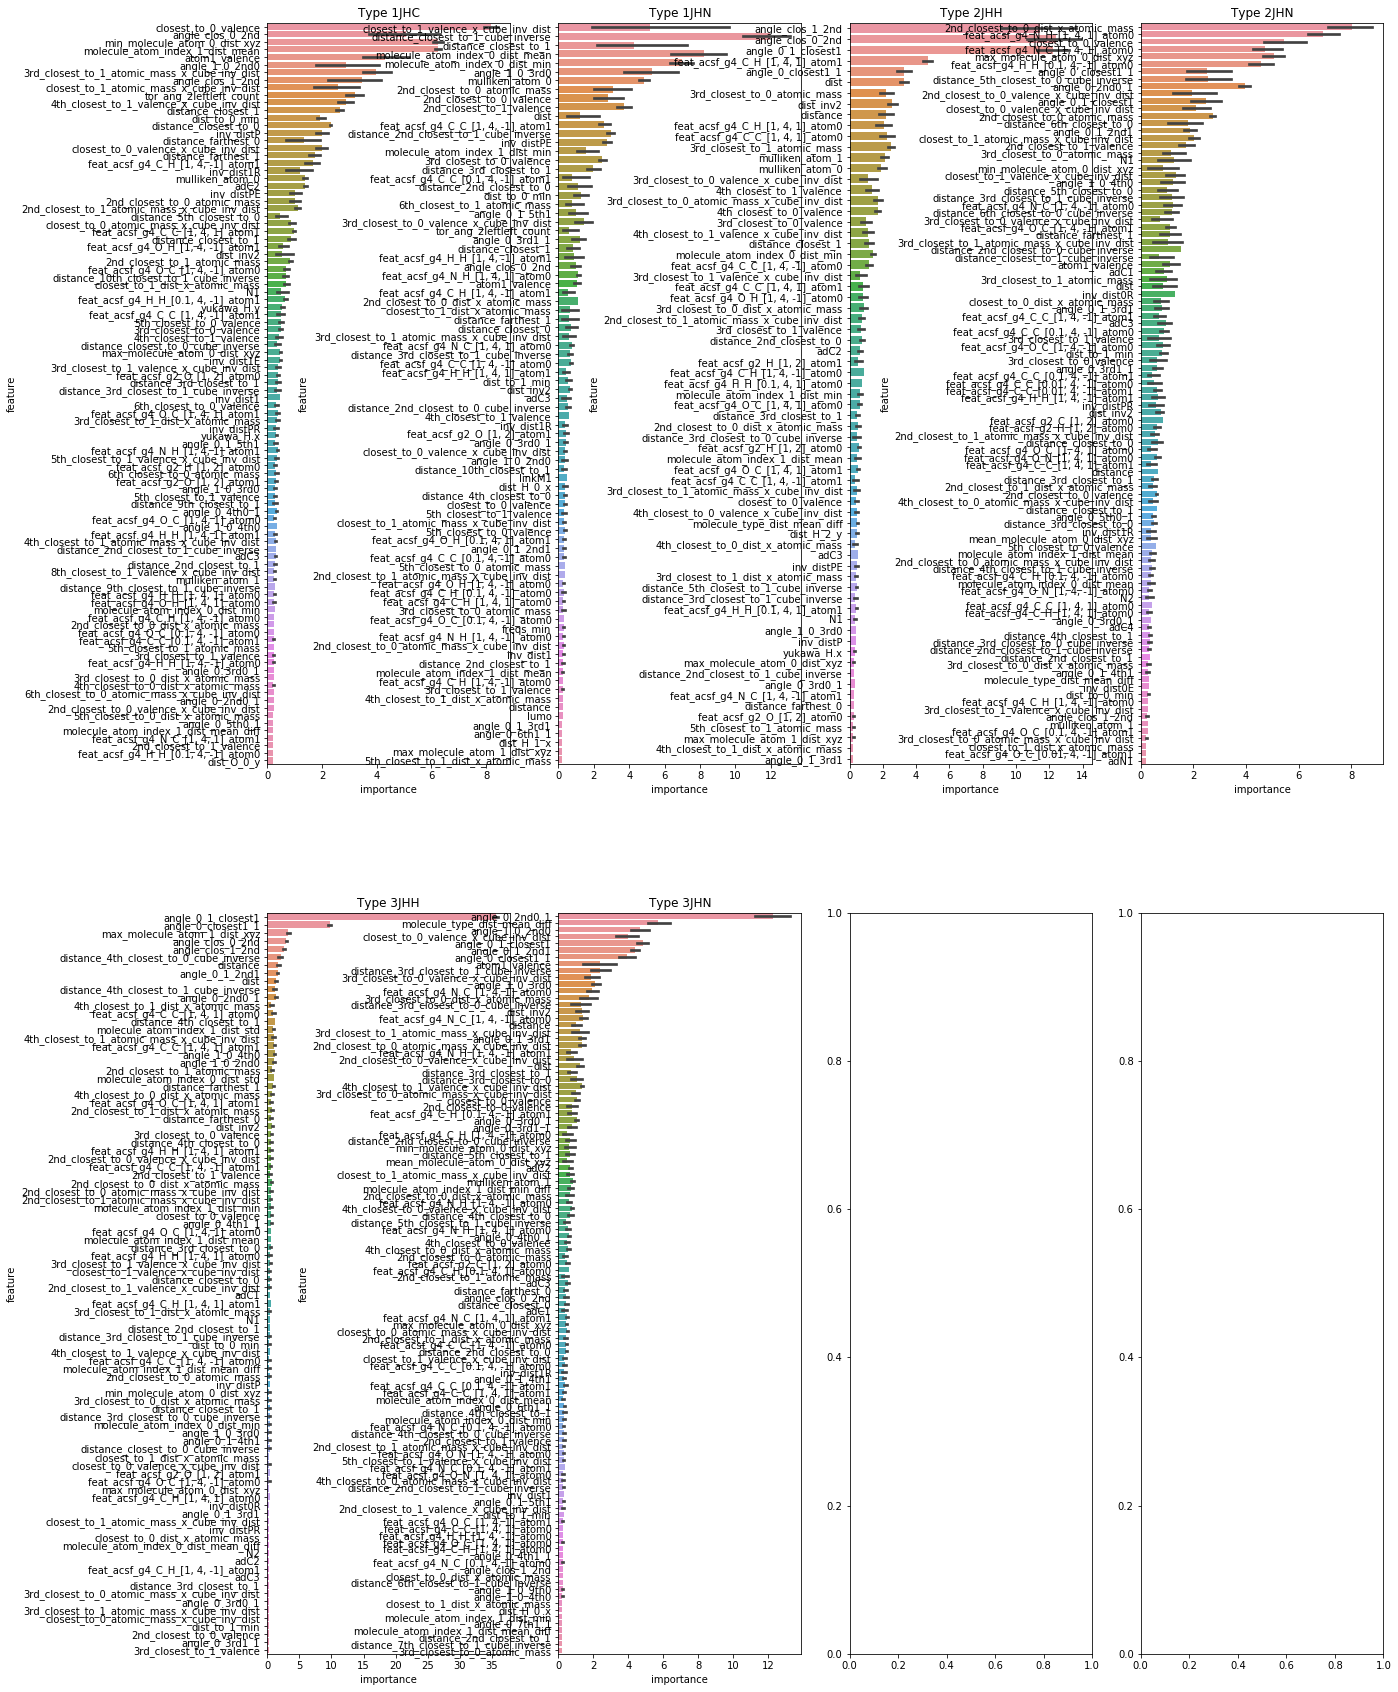

In [53]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 30))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
ax_idx = 0
for t in use_feats.columns.tolist():
    fi_t = fi_meta.loc[fi_meta['type'] == t]
    fi_t = fi_t.loc[fi_t['importance'] >= 0.2]
    #plt.figure(figsize=(12, 20))
    sns.barplot(x='importance',
                y='feature',
                data=fi_t.sort_values('importance',
                                    ascending=False),
               ax=axes[ax_idx])
    axes[ax_idx].set_title(f'Type {t}')
    ax_idx += 1
plt.show()

In [43]:
use_feats_meta = pd.DataFrame()
for i, d in fi_meta.groupby('type'):
    print(i)
    d2 = d.groupby('feature')[['importance']].max()
    use_feats_meta[i] = d2['importance'] > 0.001

1JHC
1JHN
2JHH
2JHN
3JHH
3JHN


In [44]:
use_feats_meta.sum()

1JHC    371.0
1JHN    369.0
2JHH    355.0
2JHN    365.0
3JHH    355.0
3JHN    367.0
dtype: float64

In [21]:
use_feats_meta.shape

(383, 4)

In [22]:
use_feats.sum()

1JHN    368.0
2JHH    349.0
3JHN    367.0
dtype: float64

In [35]:
use_feats_meta.loc[use_feats_meta['3JHN'] == True].index.tolist()

['10th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '10th_closest_to_0_valence_x_cube_inv_dist',
 '10th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '10th_closest_to_1_valence_x_cube_inv_dist',
 '12th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '12th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '13th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '14th_closest_to_1_atomic_mass_x_cube_inv_dist',
 '2nd_closest_to_0_atomic_mass',
 '2nd_closest_to_0_atomic_mass_x_cube_inv_dist',
 '2nd_closest_to_0_dist_x_atomic_mass',
 '2nd_closest_to_0_valence',
 '2nd_closest_to_0_valence_x_cube_inv_dist',
 '2nd_closest_to_1_atomic_mass',
 '2nd_closest_to_1_atomic_mass_x_cube_inv_dist',
 '2nd_closest_to_1_dist_x_atomic_mass',
 '2nd_closest_to_1_valence',
 '2nd_closest_to_1_valence_x_cube_inv_dist',
 '3rd_closest_to_0_atomic_mass',
 '3rd_closest_to_0_atomic_mass_x_cube_inv_dist',
 '3rd_closest_to_0_dist_x_atomic_mass',
 '3rd_closest_to_0_valence',
 '3rd_closest_to_0_valence_x_cube_inv_dist',
 '3rd_closest_to_1_a